# LLM with tool calls using LangGraph

In [ ]:
# Import libraries
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langchain_core.messages.human import HumanMessage
from langchain_core.messages.ai import AIMessage
from IPython.display import Image, display
from langchain_openai import ChatOpenAI


## Bind tools with LLM

In [3]:
# Define Tool
def multiply(a: int, b: int) -> int:
    """
        Function to multiply 2 given numbers
        The return value is an integer which is the product of a and b
    """
    return a * b

In [4]:
# Instantiate LLM and bind tools
llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools([multiply])

In [6]:
# Test normal case
response = llm_with_tools.invoke([HumanMessage(content="What is a large language model?")])
response.pretty_print()

================================== Ai Message ==================================

A large language model (LLM) is an artificial intelligence system designed to understand, generate, and manipulate human language. These models are based on deep learning architectures, usually neural networks with many parameters, which allow them to process and produce text in a way that mimics human language use. Here are some key features of large language models:

1. **Scale and Size**: LLMs are characterized by a vast number of parameters, often ranging from hundreds of millions to billions, allowing them to capture complex linguistic patterns and nuances.

2. **Training**: They are trained on massive datasets containing text from the internet, books, articles, and other sources. This training helps them learn grammar, facts about the world, reasoning abilities, and even some level of context understanding.

3. **Capabilities**: LLMs can perform a variety of tasks, including but not limited to langu

In [8]:
# Test tool call
# Test normal case
response = llm_with_tools.invoke([HumanMessage(content="What is the product of 2 and 20?")])
response.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  multiply (call_bYdofwAhKQa9SgkORWKAAqTS)
 Call ID: call_bYdofwAhKQa9SgkORWKAAqTS
  Args:
    a: 2
    b: 20


## Bundle tool call LLM in a Graph

In [25]:
# Deine tool call node
def tool_calling_llm(state: MessagesState):
    state["messages"] = llm_with_tools.invoke(state["messages"])
    return state

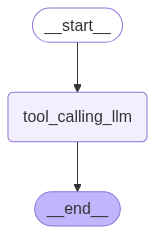

In [26]:
# Instatiate graph
graphBuilder = StateGraph(MessagesState)
graphBuilder.add_node("tool_calling_llm", tool_calling_llm)

graphBuilder.add_edge(START, "tool_calling_llm")
graphBuilder.add_edge("tool_calling_llm", END)

graph = graphBuilder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

## Test the setup

In [29]:
messages = graph.invoke({"messages": [HumanMessage(content="Hi! How are you?", name="Arnab")]})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================
Name: Arnab

Hi! How are you?
================================== Ai Message ==================================

Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?


In [30]:
messages = graph.invoke({"messages": [HumanMessage(content="What is the product of 3 and 4?", name="Arnab")]})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================
Name: Arnab

What is the product of 3 and 4?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_Vpn6VFlh7DvOafmQvOz6ynXj)
 Call ID: call_Vpn6VFlh7DvOafmQvOz6ynXj
  Args:
    a: 3
    b: 4
